In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [13]:
# Loading Dataset
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")


In [14]:
# Displaying the first few rows of the dataset
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [15]:
# Checking for null values
print(df.isnull().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


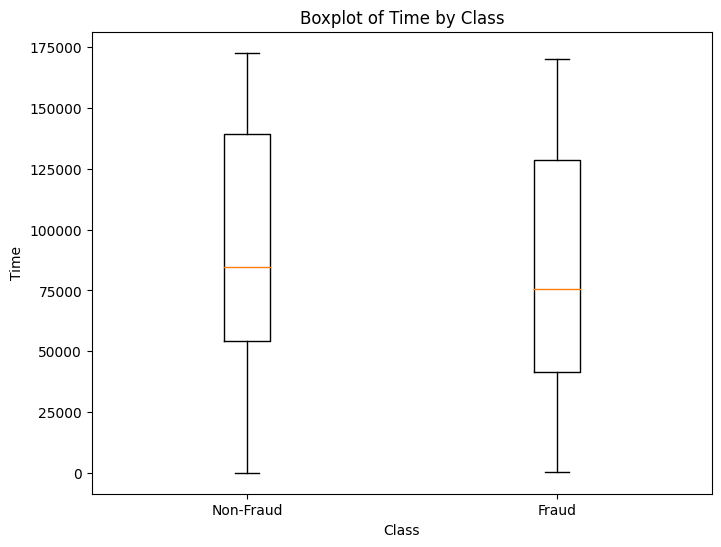

In [17]:
# Boxplot with matplotlib
plt.figure(figsize=(8, 6))
plt.boxplot([df[df['Class'] == 0]['Time'], df[df['Class'] == 1]['Time']], labels=['Non-Fraud', 'Fraud'])
plt.title('Boxplot of Time by Class')
plt.xlabel('Class')
plt.ylabel('Time')
plt.show()

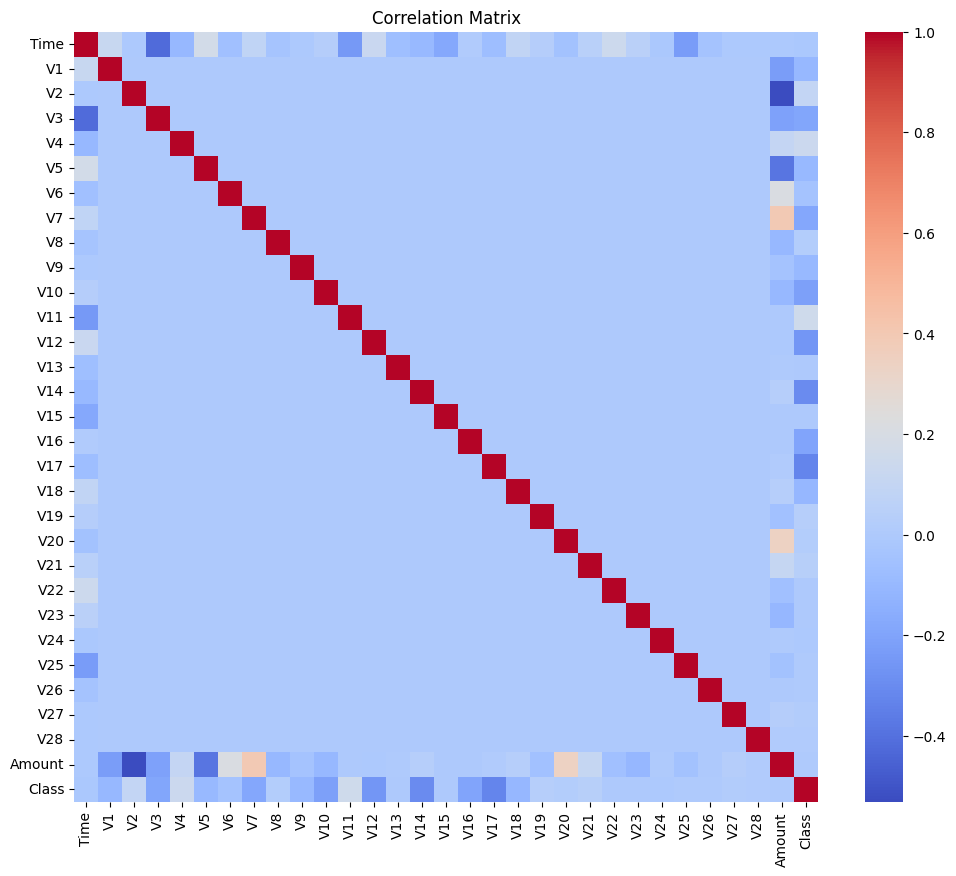

In [19]:
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [20]:
# Model Selection
x = df.drop(['Class'], axis='columns')
y = df.Class


In [21]:
# Logistic Regression Model
model1 = LogisticRegression(max_iter=1000)
score_model1 = cross_val_score(model1, x, y, cv=5)
print("Logistic Regression Cross Validation Scores:", score_model1)
print("Average Cross Validation Score for Logistic Regression:", np.average(score_model1))


Logistic Regression Cross Validation Scores: [0.98239177 0.99942067 0.99877109 0.99929777 0.9988062 ]
Average Cross Validation Score for Logistic Regression: 0.9957374982446364


In [22]:
# Random Forest Classifier Model
model2 = RandomForestClassifier()
score_model2 = cross_val_score(model2, x, y, cv=5)
print("Random Forest Classifier Cross Validation Scores:", score_model2)
print("Average Cross Validation Score for Random Forest Classifier:", np.average(score_model2))


Random Forest Classifier Cross Validation Scores: [0.00730311 0.99959622 0.99917487 0.99970155 0.99943821]
Average Cross Validation Score for Random Forest Classifier: 0.801042794545965


In [23]:
# Training and evaluating the Logistic Regression Model
model1.fit(x, y)
print("Logistic Regression Model Score:", model1.score(x, y))


Logistic Regression Model Score: 0.9991397683343457


In [24]:

# Confusion Matrix and Classification Report for Logistic Regression Model
y_pred = model1.predict(x)
print("Confusion Matrix for Logistic Regression Model:")
print(confusion_matrix(y, y_pred))
print("Classification Report for Logistic Regression Model:")
print(classification_report(y, y_pred))


Confusion Matrix for Logistic Regression Model:
[[284258     57]
 [   188    304]]
Classification Report for Logistic Regression Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.84      0.62      0.71       492

    accuracy                           1.00    284807
   macro avg       0.92      0.81      0.86    284807
weighted avg       1.00      1.00      1.00    284807



The model correctly identified the vast majority of non-fraudulent transactions, but it had more difficulty detecting fraudulent transactions, as evidenced by the relatively high number of false negatives. false negatives.
